In [1]:
#for tf_idf
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
#TfIdf
def Tf_Idf (lemmas) :
    
    voc=[]
    for l in lemmas :
        
        voc.extend(l['Lemmes'].tolist())  # Assuming 'Lemmes' column contains the terms
    voc = list(set(voc)) 
    
    vectorizer = TfidfVectorizer(lowercase=False, vocabulary=voc, min_df=2)
    documents = [" ".join(l['Lemmes'].tolist()) for l in lemmas]
    vectorizer.fit(documents)
    vectors=vectorizer.transform(documents)
    """
    vectors=[]
    for l in lemmas :
        X=vectorizer.transform([" ".join(l['Lemmes'].tolist())])
        vectors.append(X)
        """
    return vectors,vectorizer
t_lemmas=[v for k, v in pd.read_parquet('Data/lemmes.parquet', engine='pyarrow').groupby('Id')]+[v for k, v in pd.read_parquet('Data/lemmes_2.parquet', engine='pyarrow').groupby('Id')]
vec,vectorizer=Tf_Idf(t_lemmas)

In [ ]:
#matrice des thèmes
texts=pd.read_csv("Data/base_csv_final.csv")


all_themes = set(','.join(texts['Themes']).split(','))

# Step 2: Create a dictionary to map themes to column indices
theme_to_column = {theme: idx for idx, theme in enumerate(sorted(all_themes))}

# Step 3: Create a binary matrix for the themes
# Initialize an empty matrix of shape (number of books, number of unique themes)
matrix = []

for _, row in texts.iterrows():
    # Create a row with 0s
    row_vector = [0] * len(all_themes)
    
    # Split the themes for the current book and mark the corresponding columns with 1
    themes_in_book = row['Themes'].split(',')
    
    for theme in themes_in_book:
        # Mark the column corresponding to the theme as 1
        if theme in theme_to_column:
            row_vector[theme_to_column[theme]] = 1
    
    # Append the row to the matrix
    matrix.append(row_vector)

# Step 4: Convert the matrix to a DataFrame
theme_matrix = pd.DataFrame(matrix, columns=sorted(all_themes))

# Show the result
print(theme_matrix.sample(10))
print(theme_to_column)


     Ambitions   Arts et Culture   Aventures   Comédie   Conte   Coutumes  \
13           0                 0           0         0       0          0   
77           0                 1           0         1       0          1   
15           0                 0           0         0       0          0   
55           0                 1           1         0       1          0   
31           0                 0           0         0       0          1   
60           0                 0           0         0       0          1   
57           0                 0           0         0       0          1   
54           0                 1           1         0       1          0   
66           0                 0           0         0       0          0   
63           0                 0           0         0       0          0   

     Critique   Décadence   Fantastique   Fiction historique  ...  \
13          0           0             0                    0  ...   
77          0 

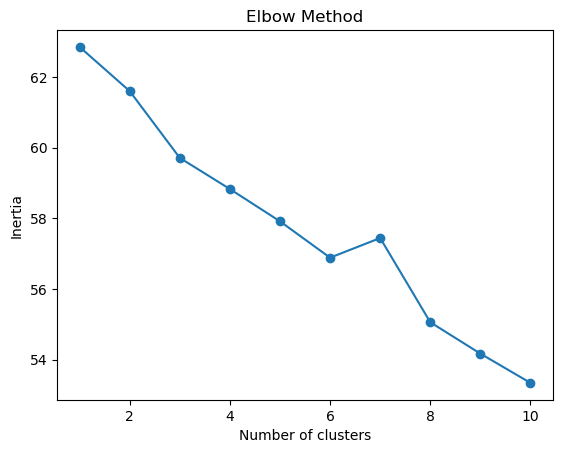

In [ ]:
#for the elbow curve
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'data' is a CSR matrix (sparse matrix) like the result from TfidfVectorizer
# data = csr_matrix(...) # Your input CSR matrix

inertias = []

# Loop over the range of cluster sizes (1 to 10 clusters)
for i in range(1, 11):
    # Initialize KMeans with i clusters
    kmeans = KMeans(n_clusters=i, random_state=42)  # Setting random_state for reproducibility
    kmeans.fit(vec)  # Fit KMeans to the sparse matrix
    inertias.append(kmeans.inertia_)  # Append inertia (sum of squared distances of samples to their closest cluster center)

# Plot the Elbow Method to help choose the best number of clusters
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

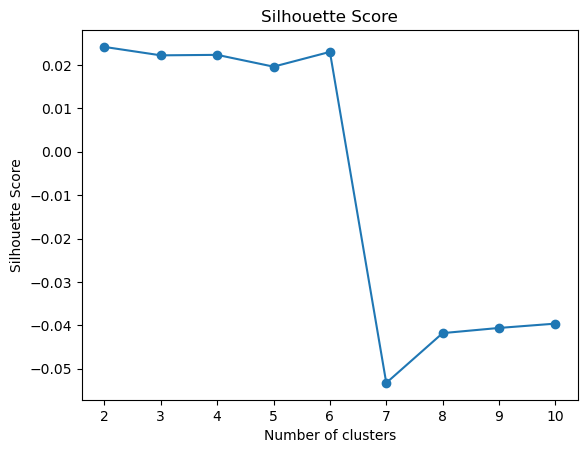

In [ ]:
#for the silhouette scores
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(vec)
    score = silhouette_score(vec, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

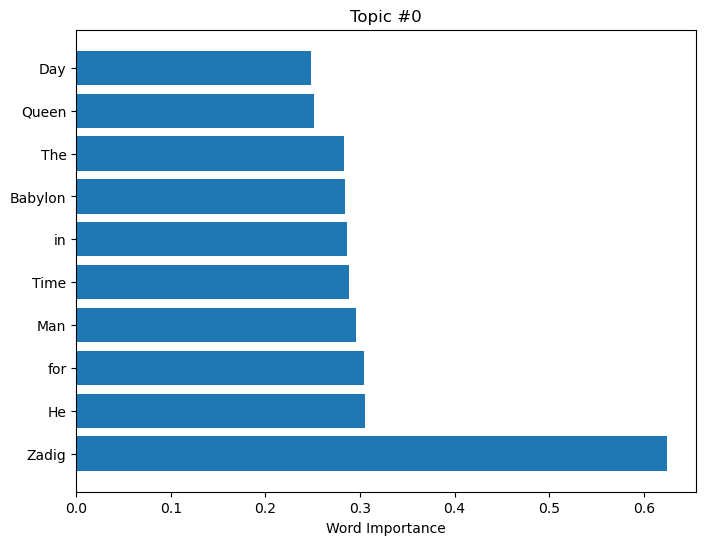

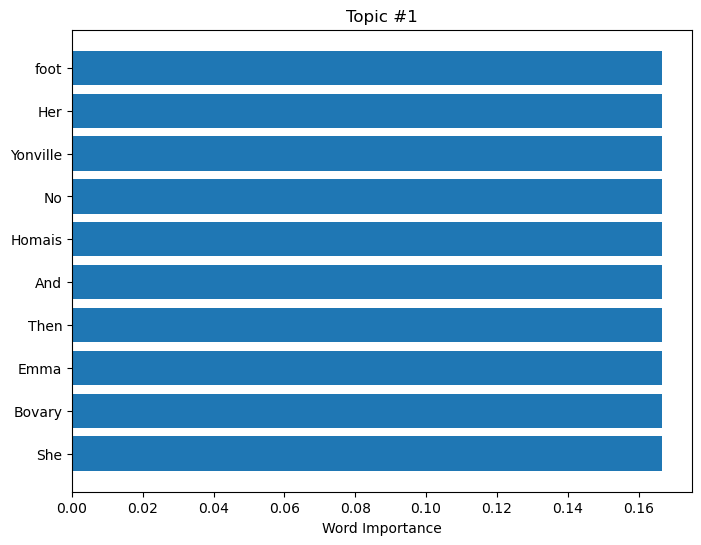

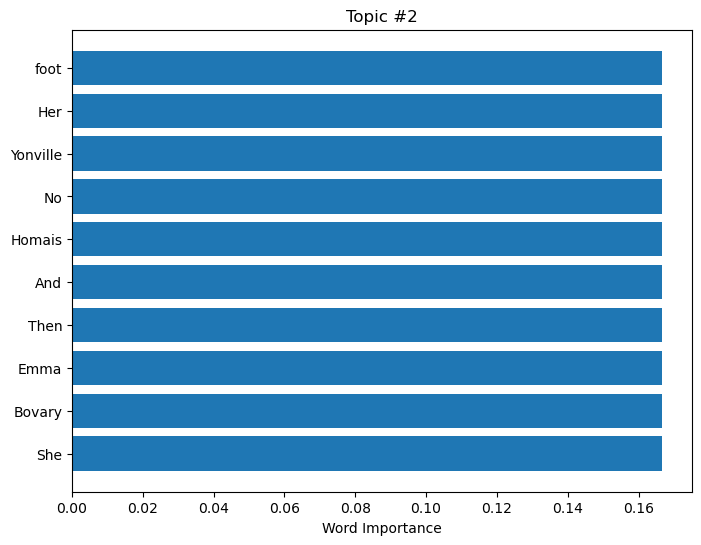

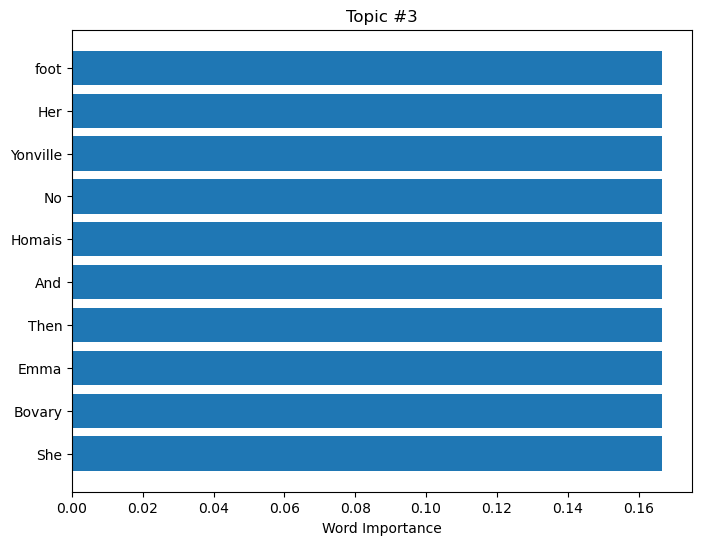

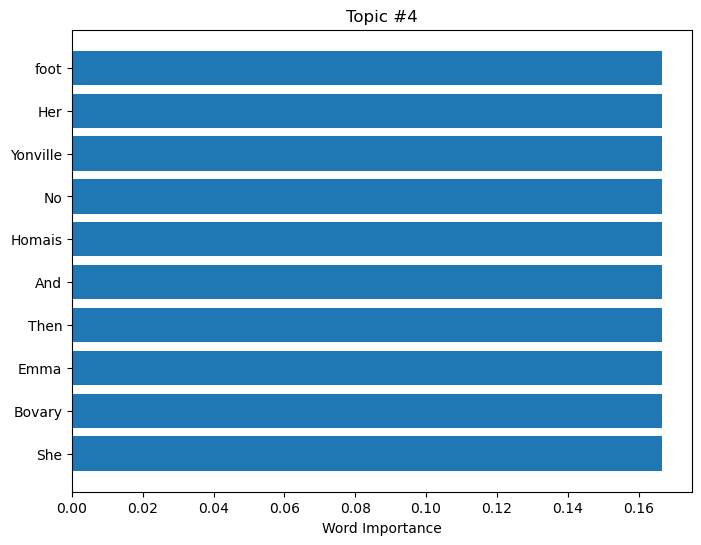

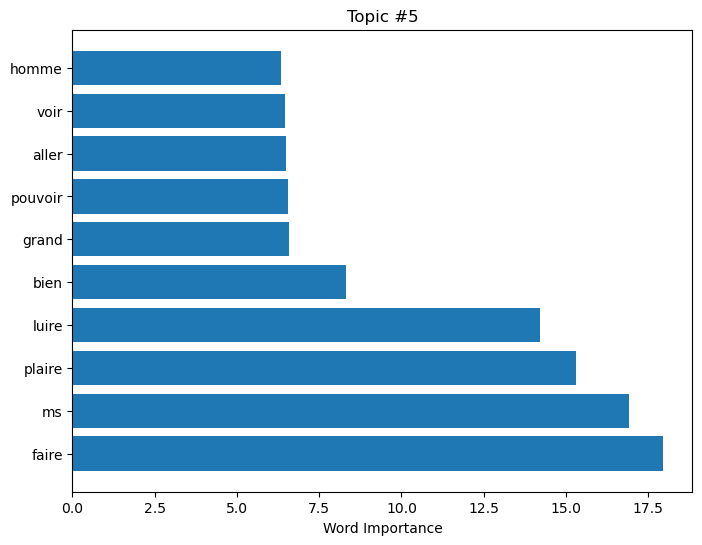

In [ ]:
#attempt at lda
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=6, random_state=42)  # 5 topics, for example
lda.fit(vec)  # Assuming you have a TF-IDF matrix

n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

# Plot top words for each topic
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    
    plt.figure(figsize=(8, 6))
    plt.barh(top_words, topic[top_words_idx], align='center')
    plt.title(f"Topic #{topic_idx}")
    plt.xlabel('Word Importance')
    plt.show()

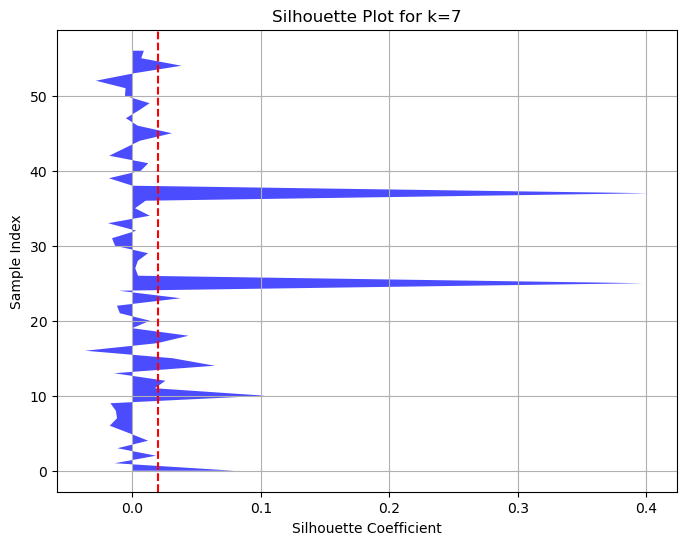

In [50]:
import numpy as np
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(X, model.labels_)
    
    # Create a silhouette plot for the current k
plt.figure(figsize=(8, 6))
    
    # Silhouette plot
plt.fill_betweenx(np.arange(len(silhouette_vals)), 0, silhouette_vals, facecolor='blue', alpha=0.7)
plt.axvline(x=np.mean(silhouette_vals), color='red', linestyle='--')  # Average silhouette score
plt.title(f'Silhouette Plot for k={k}')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Sample Index')
plt.grid(True)
    
    # Show the plot
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

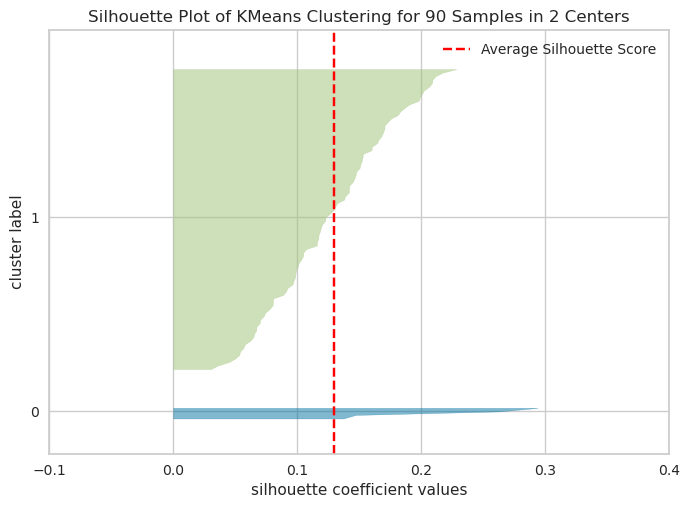

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

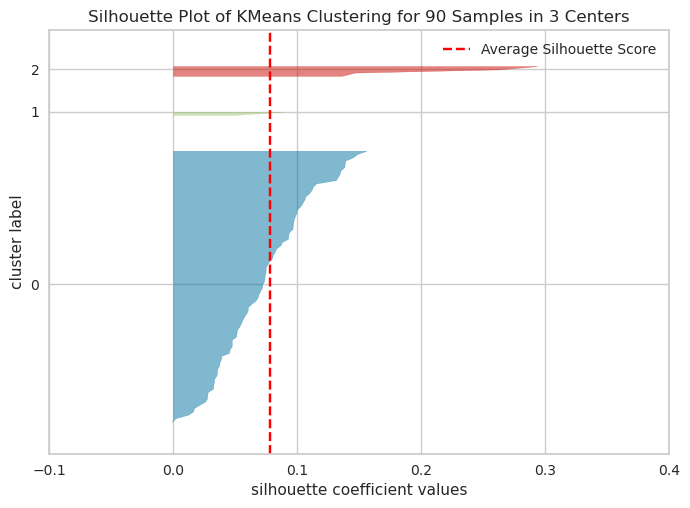

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

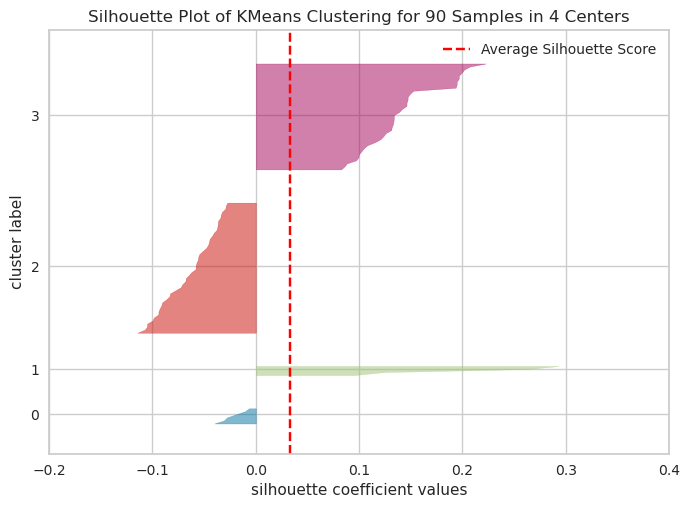

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

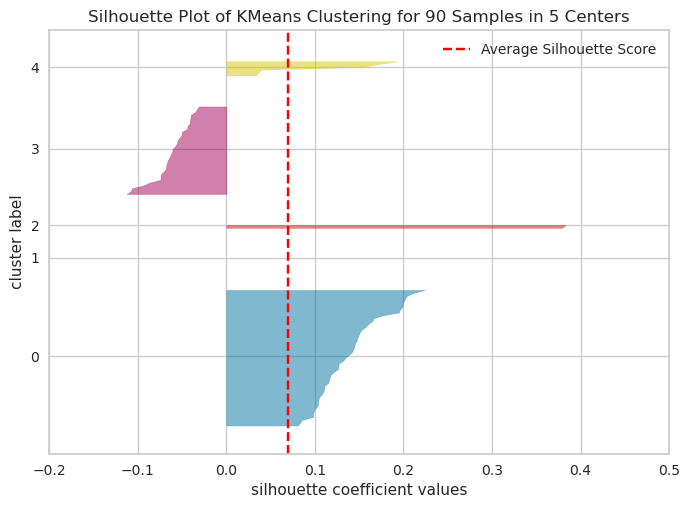

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

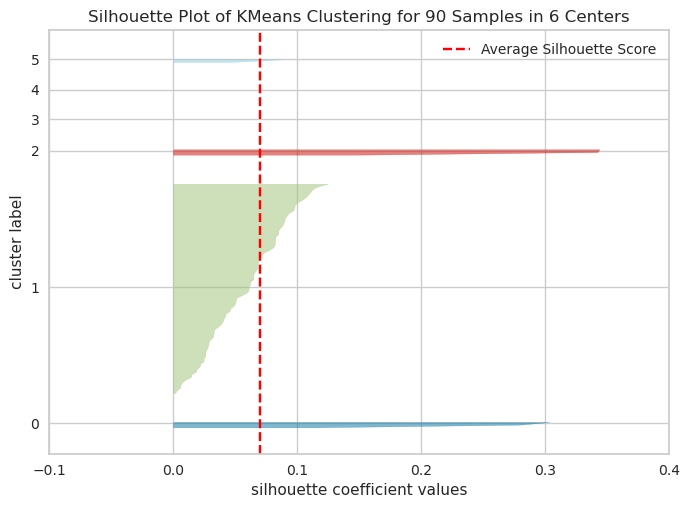

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

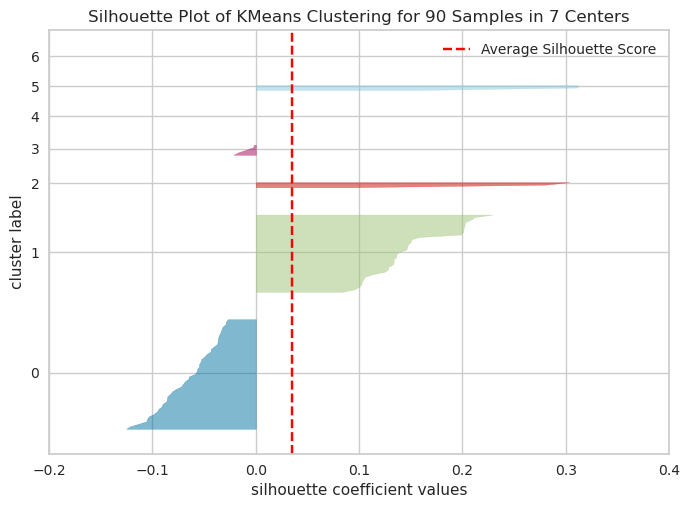

In [ ]:
#silhouette of the clusters
from yellowbrick.cluster import SilhouetteVisualizer #pip install
max_k = min(90 - 1, 7)  # Maximum k is n_samples - 1 (7 for 8 documents)
k_range = range(2, max_k + 1)

# Plotting silhouette visualizations for different values of k
for k in k_range:
    # Fit KMeans with the current value of k
    model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(vec)  # Fit the model
    visualizer.show()  # Show the silhouette plot